In [ ]:
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.layers import Input, Flatten, Embedding, multiply, Dropout
from tensorflow.keras.optimizers import Adam
from keras import initializers

In [ ]:
def plot_images(images):

  fig = plt.figure(figsize=(4, 10))
  for i in range(40):
    plt.subplot(10, 4, i+1)
    plt.imshow(images[i, :, :, 0])
    plt.axis('off')

In [ ]:
def plot_bar(images):

  labels = []
  index = range(0,10)
  for dataset in images:
    labels.append(dataset.shape[0])

  plt.figure(figsize=(15,7))
  plt.bar(index, labels, width = 0.6)
  plt.show()

In [ ]:
def resize_data(data, compteur, minimum):

  random_generator = np.random.default_rng()
  shape = data.shape
  difference = data.shape[0] - minimum
  to_delete  = random_generator.choice(data.shape[0], size=difference, replace=False)

  data = np.delete(data, to_delete, axis=0)
  #print("Resizing:")
  #print(shape, " -> ", data.shape, "\n")
    
  return data

In [ ]:
# we can probably merge these two function
def cut_data(data, mask):

  random_generator = np.random.default_rng()

  for index, category in enumerate(data):

    size = int(category.shape[0] * (1 - mask[index]))
    shape = category.shape
    to_delete  = random_generator.choice(category.shape[0], size=size, replace=False)
    data[index] = np.delete(category, to_delete, axis=0)
    #print("Resizing:")
    #print(shape, " -> ", data[index].shape, "\n")
  
  return data

In [ ]:
def merge_shuffle_and_separate_data(data, split):

  labels = []
  for index, dataset in enumerate(data):
    labels.append(np.ones(shape=dataset.shape[0]) * index)

  data = np.concatenate(data, axis=0)
  labels = np.concatenate(labels)

  assert labels.shape[0] == data.shape[0]

  arg_shuffle = np.random.permutation(labels.shape[0])
  data    = data[arg_shuffle]
  labels  = labels[arg_shuffle]   #shuffling

  split_index = int(labels.shape[0] * (1-split))

  train_images = data[:split_index]
  test_images  = data[split_index:]

  train_labels = labels[:split_index]
  test_labels  = labels[split_index:]

  a=train_labels.shape[0]
  b=test_labels.shape[0]

  return (train_images, train_labels), (test_images, test_labels)

In [ ]:
def prepare_data(mask, split):

  # importing MNIST
  (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

  images = np.concatenate((train_images, test_images))
  labels = np.append(train_labels, test_labels)

  """
  print("------------------------------------------------")
  print("images.shape   :    ", images.shape)
  print("------------------------------------------------")
  print("labels.shape   :    ", labels.shape)
  print("------------------------------------------------")
  """

  # could be optimized but I wanted to get something clean and lisible
  images_zero   = images[np.argwhere(labels==0)].squeeze()
  images_one    = images[np.argwhere(labels==1)].squeeze()
  images_two    = images[np.argwhere(labels==2)].squeeze()
  images_three  = images[np.argwhere(labels==3)].squeeze()
  images_four   = images[np.argwhere(labels==4)].squeeze()
  images_five   = images[np.argwhere(labels==5)].squeeze()
  images_six    = images[np.argwhere(labels==6)].squeeze()
  images_seven  = images[np.argwhere(labels==7)].squeeze()
  images_eight  = images[np.argwhere(labels==8)].squeeze()
  images_nine   = images[np.argwhere(labels==9)].squeeze()
  set_images = [images_zero, images_one, images_two, images_three, images_four, images_five, images_six, images_seven, images_eight, images_nine]

  # observing the sizes and finding the minimum size, aswell as the total (should be 70000 every time)
  counting = 0
  for index, dataset in enumerate(set_images):
    counting += dataset.shape[0]
    #print("for the category:", index, "  |  shape of the category:", dataset.shape)

  #print("\ncounting = ", counting)

  minimum = counting
  for dataset in set_images:
    if dataset.shape[0] < minimum: minimum = dataset.shape[0]
  #print("\nminimum = ", minimum)

  #plot_images(set_images)
  #plot_bar(set_images)

  for index, dataset in enumerate(set_images):
    set_images[index] = resize_data(dataset, counting, minimum)


  #plot_bar(set_images)

  non_iid_data = cut_data(set_images, mask)

  plot_bar(non_iid_data)

  (train_images, train_labels), (test_images, test_labels) = merge_shuffle_and_separate_data(non_iid_data, split)

  #train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
  #test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

  train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2])
  test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2])

  #train_images, test_images = train_images/255, test_images/255

  print("---------------------------------------------------------")
  print("train_images: ", train_images.shape)
  print("train_labels: ", train_labels.shape)
  print("---------------------------------------------------------")
  print("test_images: ", test_images.shape)
  print("test_labels: ", test_labels.shape)
  print("---------------------------------------------------------")

  return (train_images, train_labels), (test_images, test_labels)

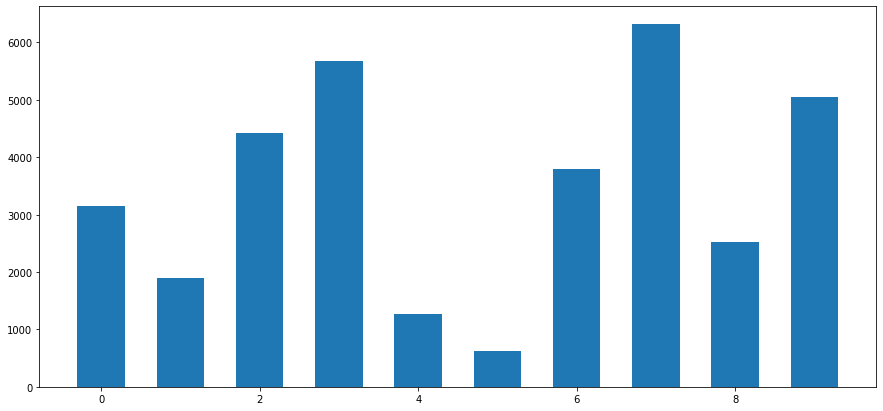

---------------------------------------------------------
train_images:  (34726, 28, 28)
train_labels:  (34726,)
---------------------------------------------------------
test_images:  (0, 28, 28)
test_labels:  (0,)
---------------------------------------------------------


In [ ]:
mask_even   = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   # iid dataset
mask        = [0.5, 0.3, 0.7, 0.9, 0.2, 0.1, 0.6, 1, 0.4, 0.8]   # random non_iid dataset
split       = 0   # train and test split percentage, 0.3 means 70% of training data and 30% fo test data

(X_train, y_train), (X_test, y_test) = prepare_data(mask, split)   # <---  modify here

#(X_train, y_train), (X_test, y_test) = mnist.load_data()

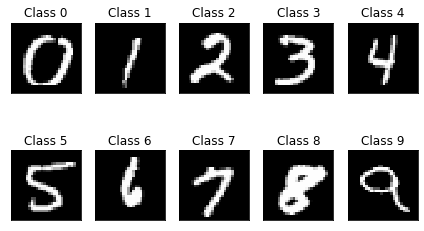

In [ ]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [ ]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)

# reshaping the inputs
X_train = X_train.reshape(X_train.shape[0], 28*28)
# normalizing the inputs (-1, 1)
X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train.shape (34726, 28, 28)
y_train.shape (34726,)
X_train reshape: (34726, 784)


In [ ]:
# latent space dimension
latent_dim = 100

# imagem dimension 28x28
img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Generator network
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 2
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 3
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Output layer 
generator.add(Dense(img_dim, activation='tanh'))

In [ ]:
# prints a summary representation of your model
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               12928     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [ ]:
# Embedding condition in input layer
num_classes = 10

# Create label embeddings
label = Input(shape=(1,), dtype='int32')
label_embedding = Embedding(num_classes, latent_dim)(label)
label_embedding = Flatten()(label_embedding)

# latent space
z = Input(shape=(latent_dim,))

# Merge inputs (z x label)
input_generator = multiply([z, label_embedding])

# Output image
img = generator(input_generator)

# Generator with condition input
generator = Model([z, label], img)

In [ ]:
# prints a summary representation of your model
generator.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 100)       1000        ['input_5[0][0]']                
                                                                                                  
 input_6 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 flatten_2 (Flatten)            (None, 100)          0           ['embedding_2[0][0]']            
                                                                                            

In [ ]:
# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

In [ ]:
# prints a summary representation of your model
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
# Embedding condition in input layer

# Create label embeddings
label_d = Input(shape=(1,), dtype='int32')
label_embedding_d = Embedding(num_classes, img_dim)(label_d)
label_embedding_d = Flatten()(label_embedding_d)

# imagem dimension 28x28
img_d = Input(shape=(img_dim,))

# Merge inputs (img x label)
input_discriminator = multiply([img_d, label_embedding_d])

# Output image
validity = discriminator(input_discriminator)

# Discriminator with condition input
discriminator = Model([img_d, label_d], validity)

In [ ]:
# prints a summary representation of your model
discriminator.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 784)       7840        ['input_7[0][0]']                
                                                                                                  
 input_8 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 flatten_3 (Flatten)            (None, 784)          0           ['embedding_3[0][0]']            
                                                                                            

In [ ]:
# Optimizer
optimizer = Adam(lr=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
discriminator.trainable = False

validity = discriminator([generator([z, label]), label])

d_g = Model([z, label], validity)

d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
# prints a summary representation of your model
d_g.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 model_3 (Functional)           (None, 784)          584312      ['input_6[0][0]',                
                                                                  'input_5[0][0]']                
                                                                                                  
 model_4 (Functional)           (None, 1)            273441      ['model_3[0][0]',          

epoch = 1/100, d_loss=0.648, g_loss=1.234                                                                                                     


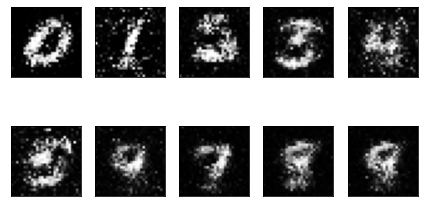

epoch = 2/100, d_loss=0.656, g_loss=1.047                                                                                                     
epoch = 3/100, d_loss=0.658, g_loss=0.967                                                                                                     
epoch = 4/100, d_loss=0.650, g_loss=1.011                                                                                                     
epoch = 5/100, d_loss=0.679, g_loss=1.001                                                                                                     
epoch = 6/100, d_loss=0.646, g_loss=0.945                                                                                                     
epoch = 7/100, d_loss=0.637, g_loss=0.995                                                                                                     
epoch = 8/100, d_loss=0.661, g_loss=0.999                                                                                                     

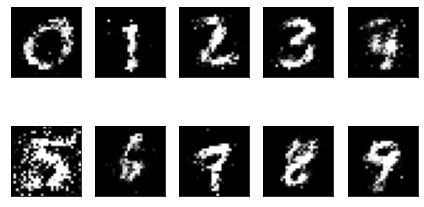

epoch = 12/100, d_loss=0.665, g_loss=1.003                                                                                                     
epoch = 13/100, d_loss=0.663, g_loss=0.971                                                                                                     
epoch = 14/100, d_loss=0.643, g_loss=0.963                                                                                                     
epoch = 15/100, d_loss=0.664, g_loss=1.029                                                                                                     
epoch = 16/100, d_loss=0.632, g_loss=0.899                                                                                                     
epoch = 17/100, d_loss=0.647, g_loss=1.048                                                                                                     
epoch = 18/100, d_loss=0.649, g_loss=1.045                                                                                              

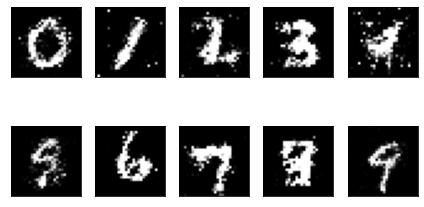

epoch = 22/100, d_loss=0.652, g_loss=0.957                                                                                                     
epoch = 23/100, d_loss=0.642, g_loss=1.000                                                                                                     
epoch = 24/100, d_loss=0.662, g_loss=1.083                                                                                                     
epoch = 25/100, d_loss=0.673, g_loss=1.070                                                                                                     
epoch = 26/100, d_loss=0.662, g_loss=0.973                                                                                                     
epoch = 27/100, d_loss=0.651, g_loss=0.907                                                                                                     
epoch = 28/100, d_loss=0.657, g_loss=0.947                                                                                              

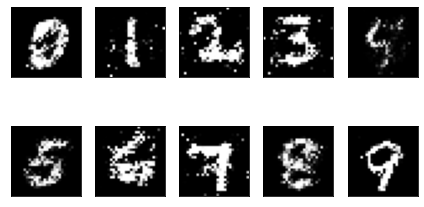

epoch = 32/100, d_loss=0.660, g_loss=0.923                                                                                                     
epoch = 33/100, d_loss=0.634, g_loss=0.956                                                                                                     
epoch = 34/100, d_loss=0.658, g_loss=1.001                                                                                                     
epoch = 35/100, d_loss=0.643, g_loss=0.996                                                                                                     
epoch = 36/100, d_loss=0.648, g_loss=1.042                                                                                                     
epoch = 37/100, d_loss=0.624, g_loss=0.972                                                                                                     
epoch = 38/100, d_loss=0.659, g_loss=0.991                                                                                              

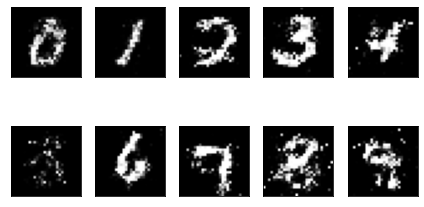

epoch = 42/100, d_loss=0.631, g_loss=0.992                                                                                                     
epoch = 43/100, d_loss=0.659, g_loss=0.929                                                                                                     
epoch = 44/100, d_loss=0.648, g_loss=1.025                                                                                                     
epoch = 45/100, d_loss=0.642, g_loss=1.021                                                                                                     
epoch = 46/100, d_loss=0.647, g_loss=1.063                                                                                                     
epoch = 47/100, d_loss=0.654, g_loss=1.004                                                                                                     
epoch = 48/100, d_loss=0.610, g_loss=1.081                                                                                              

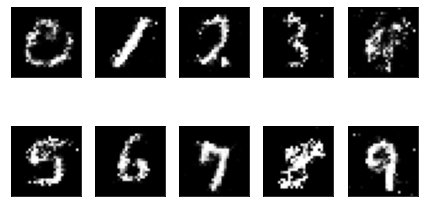

epoch = 52/100, d_loss=0.621, g_loss=0.983                                                                                                     
epoch = 53/100, d_loss=0.640, g_loss=0.969                                                                                                     
epoch = 54/100, d_loss=0.625, g_loss=0.944                                                                                                     
epoch = 55/100, d_loss=0.632, g_loss=0.983                                                                                                     
epoch = 56/100, d_loss=0.664, g_loss=0.979                                                                                                     
epoch = 57/100, d_loss=0.638, g_loss=0.996                                                                                                     
epoch = 58/100, d_loss=0.660, g_loss=1.030                                                                                              

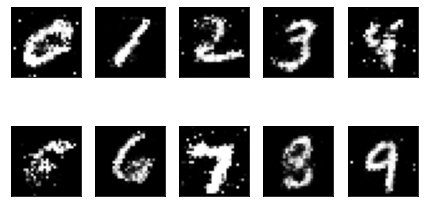

epoch = 62/100, d_loss=0.670, g_loss=0.996                                                                                                     
epoch = 63/100, d_loss=0.664, g_loss=1.063                                                                                                     
epoch = 64/100, d_loss=0.654, g_loss=1.006                                                                                                     
epoch = 65/100, d_loss=0.641, g_loss=0.969                                                                                                     
epoch = 66/100, d_loss=0.627, g_loss=1.007                                                                                                     
epoch = 67/100, d_loss=0.631, g_loss=1.033                                                                                                     
epoch = 68/100, d_loss=0.630, g_loss=1.085                                                                                              

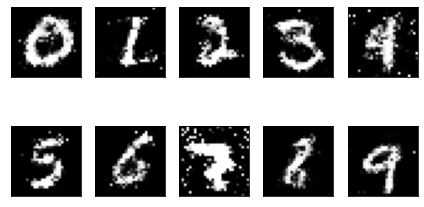

epoch = 72/100, d_loss=0.657, g_loss=1.005                                                                                                     
epoch = 73/100, d_loss=0.621, g_loss=1.034                                                                                                     
epoch = 74/100, d_loss=0.644, g_loss=1.000                                                                                                     
epoch = 75/100, d_loss=0.660, g_loss=1.067                                                                                                     
epoch = 76/100, d_loss=0.638, g_loss=1.000                                                                                                     
epoch = 77/100, d_loss=0.628, g_loss=1.071                                                                                                     
epoch = 78/100, d_loss=0.644, g_loss=0.975                                                                                              

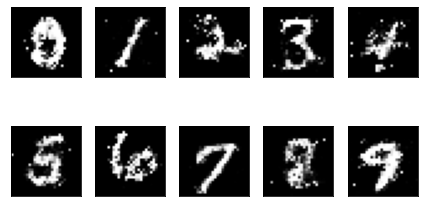

epoch = 82/100, d_loss=0.649, g_loss=0.964                                                                                                     
epoch = 83/100, d_loss=0.635, g_loss=0.976                                                                                                     
epoch = 84/100, d_loss=0.639, g_loss=1.000                                                                                                     
epoch = 85/100, d_loss=0.645, g_loss=0.968                                                                                                     
epoch = 86/100, d_loss=0.629, g_loss=0.976                                                                                                     
epoch = 87/100, d_loss=0.633, g_loss=0.981                                                                                                     
epoch = 88/100, d_loss=0.662, g_loss=1.003                                                                                              

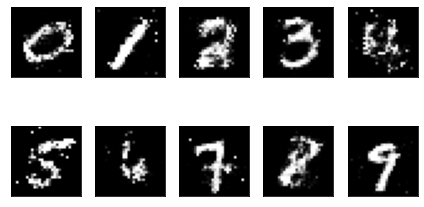

epoch = 92/100, d_loss=0.625, g_loss=0.978                                                                                                     
epoch = 93/100, d_loss=0.629, g_loss=1.053                                                                                                     
epoch = 94/100, d_loss=0.660, g_loss=1.061                                                                                                     
epoch = 95/100, d_loss=0.651, g_loss=1.021                                                                                                     
epoch = 96/100, d_loss=0.604, g_loss=0.944                                                                                                     
epoch = 97/100, d_loss=0.640, g_loss=0.973                                                                                                     
epoch = 98/100, d_loss=0.647, g_loss=0.928                                                                                              

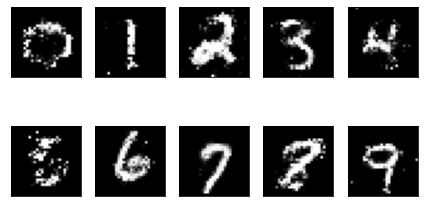

In [ ]:
epochs = 100
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):
        
        # Train Discriminator weights
        discriminator.trainable = True
        
        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        real_labels = y_train[i*batch_size:(i+1)*batch_size].reshape(-1, 1)
        
        d_loss_real = discriminator.train_on_batch(x=[X_batch, real_labels], y=real * (1 - smooth))
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        random_labels = np.random.randint(0, 10, batch_size).reshape(-1, 1)
        X_fake = generator.predict_on_batch([z, random_labels])
        
        d_loss_fake = discriminator.train_on_batch(x=[X_fake, random_labels], y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        discriminator.trainable = False
        
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        random_labels = np.random.randint(0, 10, batch_size).reshape(-1, 1)
        d_g_loss_batch = d_g.train_on_batch(x=[z, random_labels], y=real)
   
        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 10
        z = np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
        labels = np.arange(0, 10).reshape(-1, 1)
        
        x_fake = generator.predict([z, labels])

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

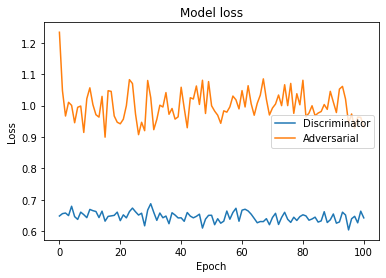

In [ ]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()